# Exploring, filtering, grouping and viewing data in [pandas](https://pandas.pydata.org/)
Demonstration notebook, using UK Police data on street-level crime in the London Metropolitan region, from https://data.police.uk/


In [131]:
import pandas as pd
import seaborn as sns
#Set max row and max column for display in Jupyter Notebook
pd.set_option('display.max_row', 150)
pd.set_option('display.max_columns', 20)

In [132]:
# Set Seaborn styling parameters for plots
sns.set(rc={'figure.figsize':(15,10)}) # Set figure size
sns.set_context("notebook") # Set display style, mostly for size of fonts

# Read and inspect data
You can read in data in a variety of formats, from Excel, CSV, JSON, SQL, and more. The sample data here is Metropolitan Police cases recorded for Feb 2022, in CSV format. We use `read_csv()` to load the file.

In [133]:
# File URL
file = r'data\2022-02-metropolitan-street.csv'
# Create dataframe (df)
df = pd.read_csv(file)

## Dimensions of the dataframe

In [134]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,86dcb4e75aee5e4f85faba482ae99f4b45d5ee7f694464...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.882064,51.173592,On or near Goat Lees Lane,E01032810,Ashford 001F,Violence and sexual offences,Under investigation,NaN
1,a8a306e3f41d1ef9b5601f0ee3f31b9bbfdbe41a64e3dc...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.875087,51.151602,On or near Hardinge Road,E01024021,Ashford 004G,Violence and sexual offences,Under investigation,NaN
2,ea3405ba86a84efdc8c67421ec725550e88f31be484be3...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.972477,51.996811,On or near Jarman Close,E01017644,Aylesbury Vale 002A,Theft from the person,Investigation complete; no suspect identified,NaN
3,70b5893bdb519eb2613e3bb932f9b7a9a3462a76e9d6df...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.804674,51.823998,On or near Rainborough Gardens,E01017662,Aylesbury Vale 015C,Violence and sexual offences,Under investigation,NaN
4,NaN,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


List the column headings for the dataframe. Handy for selecting columns

In [135]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [136]:
# Size of the dataframe (rows and columns):
df.shape

(80278, 12)

## Handling empty values with isna() and dropna()

In [137]:
# Summarise the empty values in df by column
df.isna().sum()

Crime ID                 15589
Month                        0
Reported by                  0
Falls within                 0
Longitude                 1894
Latitude                  1894
Location                     0
LSOA code                 1894
LSOA name                 1894
Crime type                   0
Last outcome category    15589
Context                  80278
dtype: int64

In [138]:
# Remove rows with empty values (NaN) in the 'LSOA name' column:
df = df.dropna(subset=['LSOA code'])

In [139]:
#Check if the NaN values have been dropped from df
df.isna().sum()

Crime ID                 15588
Month                        0
Reported by                  0
Falls within                 0
Longitude                    0
Latitude                     0
Location                     0
LSOA code                    0
LSOA name                    0
Crime type                   0
Last outcome category    15588
Context                  78384
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78384 entries, 0 to 78383
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               62796 non-null  object 
 1   Month                  78384 non-null  object 
 2   Reported by            78384 non-null  object 
 3   Falls within           78384 non-null  object 
 4   Longitude              78384 non-null  float64
 5   Latitude               78384 non-null  float64
 6   Location               78384 non-null  object 
 7   LSOA code              78384 non-null  object 
 8   LSOA name              78384 non-null  object 
 9   Crime type             78384 non-null  object 
 10  Last outcome category  62796 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 7.8+ MB


## Show head, tail or slice
`df.head()`, last rows:` df.tail()`. Show slice by index number: `df[:5]` (shows first five rows). 

For large dataframes, the name of the dataframe will display the head and tail, omitting the middle.

In [141]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,86dcb4e75aee5e4f85faba482ae99f4b45d5ee7f694464...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.882064,51.173592,On or near Goat Lees Lane,E01032810,Ashford 001F,Violence and sexual offences,Under investigation,NaN
1,a8a306e3f41d1ef9b5601f0ee3f31b9bbfdbe41a64e3dc...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.875087,51.151602,On or near Hardinge Road,E01024021,Ashford 004G,Violence and sexual offences,Under investigation,NaN
2,ea3405ba86a84efdc8c67421ec725550e88f31be484be3...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.972477,51.996811,On or near Jarman Close,E01017644,Aylesbury Vale 002A,Theft from the person,Investigation complete; no suspect identified,NaN
3,70b5893bdb519eb2613e3bb932f9b7a9a3462a76e9d6df...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.804674,51.823998,On or near Rainborough Gardens,E01017662,Aylesbury Vale 015C,Violence and sexual offences,Under investigation,NaN
4,NaN,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [142]:
df.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
78379,b68f44f18861ffe06f9ea799143aed99bf8a2f87f2c524...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.757678,51.632691,On or near West Wycombe Road,E01017837,Wycombe 015B,Violence and sexual offences,Under investigation,NaN
78380,b68f44f18861ffe06f9ea799143aed99bf8a2f87f2c524...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.757678,51.632691,On or near West Wycombe Road,E01017837,Wycombe 015B,Violence and sexual offences,Under investigation,NaN
78381,c6c0b645845e38959535cf6a480fdf82e2f50b4f54e9b1...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-0.687446,51.600977,On or near Millstream Way,E01017934,Wycombe 019A,Violence and sexual offences,Under investigation,NaN
78382,5fab93112c690e306203ad8e8d75a3b034e0f19ecca21c...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-2.316703,52.375612,On or near Supermarket,E01032428,Wyre Forest 011B,Shoplifting,Under investigation,NaN
78383,34901688fa2dff163ffad7d36032b66f6650666937d759...,2022-02,Metropolitan Police Service,Metropolitan Police Service,-1.062010,53.979251,On or near Carrnock Court,E01013406,York 005B,Violence and sexual offences,Under investigation,NaN


In [143]:
#Show a slice of the rows by index
df[200:205]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
200,4e1600ef85f3292c53d90bd0e1e7a8e95d5b9737ad09e0...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.179952,51.560464,On or near Foxglove Road,E01000039,Barking and Dagenham 003D,Bicycle theft,Investigation complete; no suspect identified,NaN
201,ae6682676d616c26d9a6cb89996bf3780ea0960e58bd85...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.178142,51.559113,On or near Bluebell Close,E01000039,Barking and Dagenham 003D,Drugs,Offender given penalty notice,NaN
202,14fd11fed32e57e4de2a3b6b5147743c82c6a3fd2bf83c...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.178904,51.557849,On or near Valentines Way,E01000039,Barking and Dagenham 003D,Other theft,Under investigation,NaN
203,c27dbc3f84a83decf58a035b14d817434449f755d2696c...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.178904,51.557849,On or near Valentines Way,E01000039,Barking and Dagenham 003D,Violence and sexual offences,Under investigation,NaN
204,324889a93e5545b84e96468508c6036c2714830dbe96f8...,2022-02,Metropolitan Police Service,Metropolitan Police Service,0.179945,51.557299,On or near Eastbrook Drive,E01000039,Barking and Dagenham 003D,Violence and sexual offences,Under investigation,NaN


## value_counts()
For categorical data, show the number of occurrences. In this case, number of incidents for each 'Crime type' category:

In [144]:
df['Crime type'].value_counts()

Violence and sexual offences    19363
Anti-social behaviour           15588
Other theft                      8622
Vehicle crime                    7971
Burglary                         4192
Theft from the person            4167
Public order                     4109
Criminal damage and arson        3868
Drugs                            3522
Shoplifting                      2781
Robbery                          1897
Bicycle theft                    1066
Other crime                       839
Possession of weapons             399
Name: Crime type, dtype: int64

## info()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78384 entries, 0 to 78383
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               62796 non-null  object 
 1   Month                  78384 non-null  object 
 2   Reported by            78384 non-null  object 
 3   Falls within           78384 non-null  object 
 4   Longitude              78384 non-null  float64
 5   Latitude               78384 non-null  float64
 6   Location               78384 non-null  object 
 7   LSOA code              78384 non-null  object 
 8   LSOA name              78384 non-null  object 
 9   Crime type             78384 non-null  object 
 10  Last outcome category  62796 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 7.8+ MB


# Selecting and filtering data

## Slice string
Create a new column with the Borough name, so that we can select rows by borough. The `slice` function returns a defined segment of the text (or *string*) in the "LSOA name" column and copies it to a new column.

In [146]:
#Create a Borough-column:
df['Borough'] = df['LSOA name'].str.slice(0, -5)

## List unique values by column

In [147]:
df['Borough'].unique()

array(['Ashford', 'Aylesbury Vale', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Basildon', 'Basingstoke and Deane', 'Bedford',
       'Bexley', 'Birmingham', 'Blackpool', 'Boston', 'Bracknell Forest',
       'Breckland', 'Brent', 'Brentwood', 'Brighton and Hove', 'Bristol',
       'Bromley', 'Broxbourne', 'Burnley', 'Camden', 'Cannock Chase',
       'Canterbury', 'Carmarthenshire', 'Castle Point',
       'Central Bedfordshire', 'Charnwood', 'Chelmsford', 'Cherwell',
       'Chichester', 'Chiltern', 'City of London', 'Colchester',
       'Cornwall', 'Cotswold', 'Coventry', 'Craven', 'Crawley', 'Croydon',
       'Dacorum', 'Dartford', 'Doncaster', 'Dover', 'Ealing',
       'East Hertfordshire', 'East Lindsey', 'East Riding of Yorkshire',
       'Elmbridge', 'Enfield', 'Epping Forest', 'Epsom and Ewell',
       'Exeter', 'Fareham', 'Flintshire', 'Gravesham', 'Great Yarmouth',
       'Greenwich', 'Guildford', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harlow', 'Harr

Now that we know that the dataset includes incidents that took place outside of London, let's select only the London Boroughs in the dataset (just as we would use a filter in Excel).

## Select with contains()
Select with a keyword. Good for single-keyword filtering, or stringing conditions together with &.

In [148]:
#Create separate dataframe for selected borough using part of the name
df_select = df[df['LSOA name'].str.contains('Carmarthenshire')]

In [149]:
#Check the shape of df_select. This shows us how many cases (rows) the borough has
df_select.shape

(1, 13)

## Select with isin()
Select rows using a list of values.

In [150]:
#List of London Boroughs, plus City of London
LB_list = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley','Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham','Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']
# Filter the dataframe to include only names in the list:
df = df[df['Borough'].isin(LB_list)]

In [151]:
#Check which Boroughs are left in the df now:
df['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

# Group and aggregate
Functions: `groupby()`, `agg()`.

Let's compare the boroughs by how many incidents are recorded for each.

In [152]:
df.keys() # Same as columns() above.

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Borough'],
      dtype='object')

## groupby()
Which borough has the most crime? We group the data by the "Borough" column, and sum up the total number of cases.

In [153]:
# Group by Borough, count total number of incidents, sort from highest to lowest
df_grouped = df.groupby(['Borough'])['Crime type'].agg('count').reset_index().sort_values(by=['Crime type'], ascending=False)

In [154]:
# Show first 10 rows of grouped dataframe
df_grouped

,Borough,Crime type
32,Westminster,6014
24,Newham,3465
29,Tower Hamlets,3208
5,Camden,3104
7,Croydon,3030
21,Lambeth,3007
27,Southwark,2957
3,Brent,2856
8,Ealing,2849
9,Enfield,2796


**Task:** Can this data be grouped differently? Experiment with a separate dataframe for comparison (df_grouped2).

### Simple bar chart comparing the number of cases by borough.

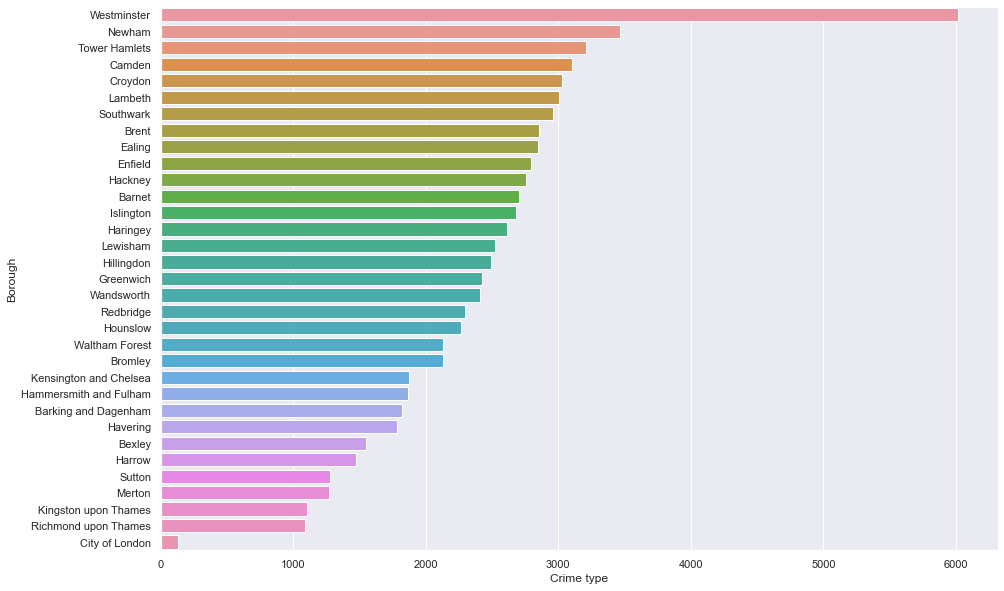

In [155]:
sns.barplot(data=df_grouped, x="Crime type", y="Borough")

## Crosstab
Compare data across categories with `crosstab()`. A a cross-tabulation table shows the frequency with which certain groups of data appear. 

The Practical Business Python blog has a good summary of Pandas' crosstab function: [Pandas Crosstab Explained](https://pbpython.com/pandas-crosstab.html)

### Simple crosstab
Crime types broken down by Borough.

In [156]:
df_crossed = pd.crosstab(df['Borough'], df['Crime type']).sort_values(by=['Borough'], ascending=True)

#### Heatmap of crosstab

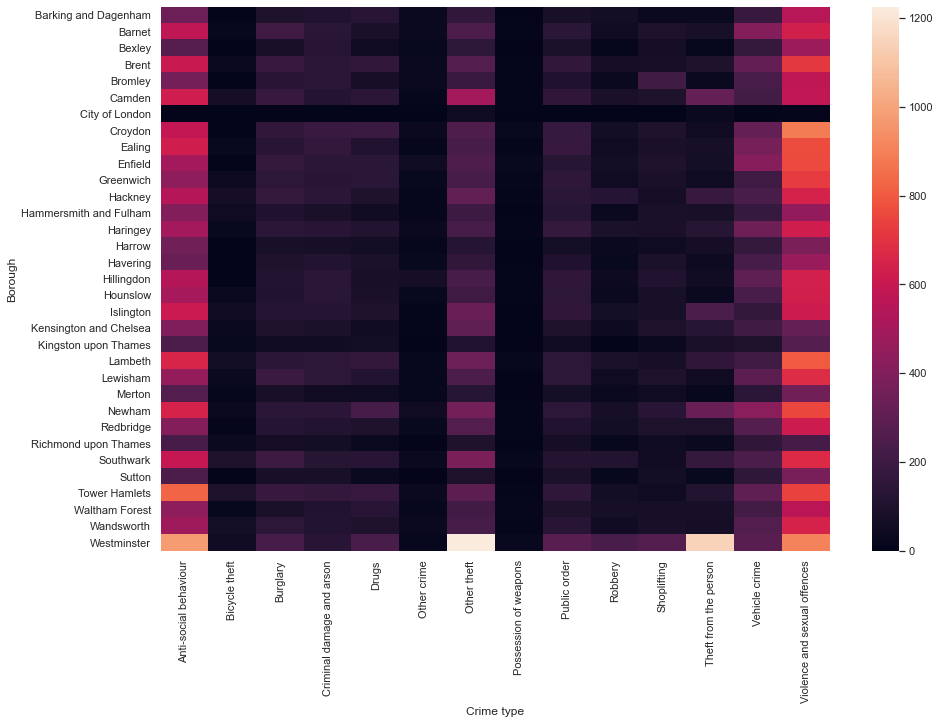

In [157]:
sns.heatmap(df_crossed)

**Task:** Would it make sense to show only specific columns? Which ones?

#### Histogram of selected crime type
Shows distribution by crime category.

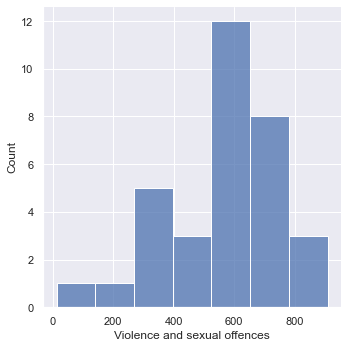

In [158]:
sns.displot(df_crossed, x="Violence and sexual offences")

#### Histogram of multiple categories
Here we select multiple columns and instruct Seaborn to display the multiple categories as "stack".

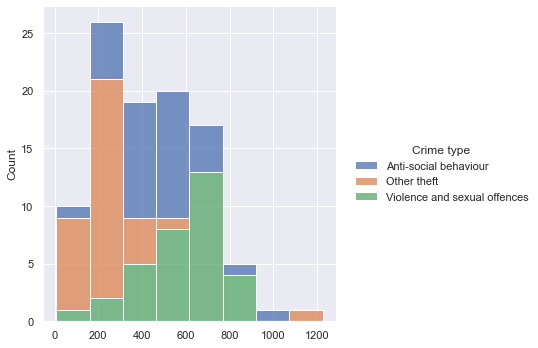

In [159]:
sns.displot(
    df_crossed[['Anti-social behaviour','Other theft', 'Violence and sexual offences']],
    multiple="stack"
    )

#### Compare frequency of selected crime category across boroughs
First we transform the crosstab dataframe (reindex, sort), and then plot the result:

In [160]:
# Transformation:
# Reset the index for df_crossed to flatten the dataframe
df_crossed.reset_index(inplace=True)
# Name of category to compare (allows us to change category quickly)
crime_category = "Bicycle theft"
# Sort the dataframe by the selected category
df_crossed.sort_values(by=[f'{crime_category}'], ascending=False, inplace=True)

Here's the head() showing the top 5 rows for the selected columns (Borough, crime_category):

In [161]:
df_crossed[['Borough', f'{crime_category}']].head()

Crime type,Borough,Bicycle theft
27,Southwark,99
29,Tower Hamlets,94
11,Hackney,68
5,Camden,68
31,Wandsworth,63


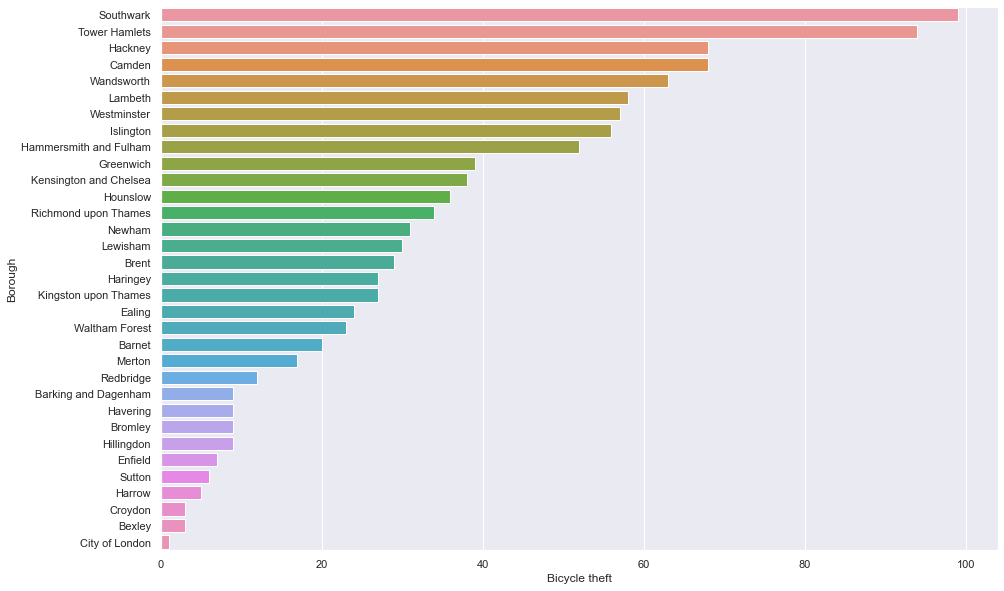

In [162]:
# Display bar plot:
sns.barplot(data=df_crossed, x=f"{crime_category}", y="Borough")

**Task:** Change the crime_cateogory variable above and run the cells again to see how the plot changes.

### Crosstab with margins
The `margins` parameter adds a row at the bottom and column at the end summarising each. The name can be specified with `margins_name`.

In [163]:
df_crossed_margins = pd.crosstab(df['Borough'], df['Crime type'], margins=True, margins_name='Crimes total').reset_index()

In [164]:
df_crossed_margins

Crime type,Borough,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Crimes total
0,Barking and Dagenham,336,9,93,109,131,36,162,8,77,58,36,35,181,554,1825
1,Barnet,576,20,202,134,86,32,246,12,135,49,91,80,407,632,2702
2,Bexley,273,3,81,131,48,24,147,6,87,16,69,20,170,475,1550
3,Brent,605,29,178,138,159,38,266,10,161,69,76,98,313,716,2856
4,Bromley,362,9,132,140,73,31,183,14,103,31,209,32,238,577,2134
5,Camden,624,68,179,116,139,17,497,14,156,82,96,318,218,580,3104
6,City of London,8,1,7,4,2,0,47,0,2,5,6,30,6,13,131
7,Croydon,586,3,161,183,190,37,253,24,174,60,97,52,320,890,3030
8,Ealing,629,24,132,167,110,19,234,11,178,49,84,72,370,770,2849
9,Enfield,495,7,172,136,135,44,250,27,126,59,100,65,416,764,2796


### Normalise
We can instruct `crosstab()` to show proportions, rather than absolute numbers with the `normalize` parameter.

In [167]:
# Crosstabl normalised by column, rounding numbers to 2 decimal places
df_cross_pct_cols = pd.crosstab(df['Borough'], df['Crime type'], normalize='columns').round(2)

In [168]:
df_cross_pct_cols

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Borough,,,,,,,,,,,,,,
Barking and Dagenham,0.02,0.01,0.02,0.03,0.04,0.04,0.02,0.02,0.02,0.03,0.01,0.01,0.02,0.03
Barnet,0.04,0.02,0.05,0.03,0.02,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.05,0.03
Bexley,0.02,0.00,0.02,0.03,0.01,0.03,0.02,0.02,0.02,0.01,0.02,0.00,0.02,0.02
Brent,0.04,0.03,0.04,0.04,0.05,0.05,0.03,0.03,0.04,0.04,0.03,0.02,0.04,0.04
Bromley,0.02,0.01,0.03,0.04,0.02,0.04,0.02,0.04,0.03,0.02,0.08,0.01,0.03,0.03
Camden,0.04,0.06,0.04,0.03,0.04,0.02,0.06,0.04,0.04,0.04,0.03,0.08,0.03,0.03
City of London,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00
Croydon,0.04,0.00,0.04,0.05,0.05,0.04,0.03,0.06,0.04,0.03,0.03,0.01,0.04,0.05
Ealing,0.04,0.02,0.03,0.04,0.03,0.02,0.03,0.03,0.04,0.03,0.03,0.02,0.05,0.04


In [169]:
# Normalised by rows
df_cross_pct_rows = pd.crosstab(df['Borough'], df['Crime type'], normalize='index').round(2)

In [170]:
df_cross_pct_rows

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Borough,,,,,,,,,,,,,,
Barking and Dagenham,0.18,0.00,0.05,0.06,0.07,0.02,0.09,0.00,0.04,0.03,0.02,0.02,0.10,0.30
Barnet,0.21,0.01,0.07,0.05,0.03,0.01,0.09,0.00,0.05,0.02,0.03,0.03,0.15,0.23
Bexley,0.18,0.00,0.05,0.08,0.03,0.02,0.09,0.00,0.06,0.01,0.04,0.01,0.11,0.31
Brent,0.21,0.01,0.06,0.05,0.06,0.01,0.09,0.00,0.06,0.02,0.03,0.03,0.11,0.25
Bromley,0.17,0.00,0.06,0.07,0.03,0.01,0.09,0.01,0.05,0.01,0.10,0.01,0.11,0.27
Camden,0.20,0.02,0.06,0.04,0.04,0.01,0.16,0.00,0.05,0.03,0.03,0.10,0.07,0.19
City of London,0.06,0.01,0.05,0.03,0.02,0.00,0.36,0.00,0.02,0.04,0.05,0.23,0.05,0.10
Croydon,0.19,0.00,0.05,0.06,0.06,0.01,0.08,0.01,0.06,0.02,0.03,0.02,0.11,0.29
Ealing,0.22,0.01,0.05,0.06,0.04,0.01,0.08,0.00,0.06,0.02,0.03,0.03,0.13,0.27


#### Histogram of normalised crime types

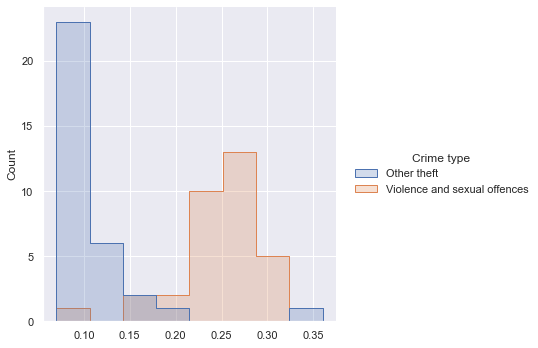

In [171]:
sns.displot(df_cross_pct_rows[['Other theft', 'Violence and sexual offences']], element="step")

#### Proportion of crime types by Borough
Heatmap of most frequent crime types for each borough. This enables us to identify "hot spots" within the dataset. The colour palette can be adjusted with the `cmap` parameter (see [Seaborn colour palettes documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)).

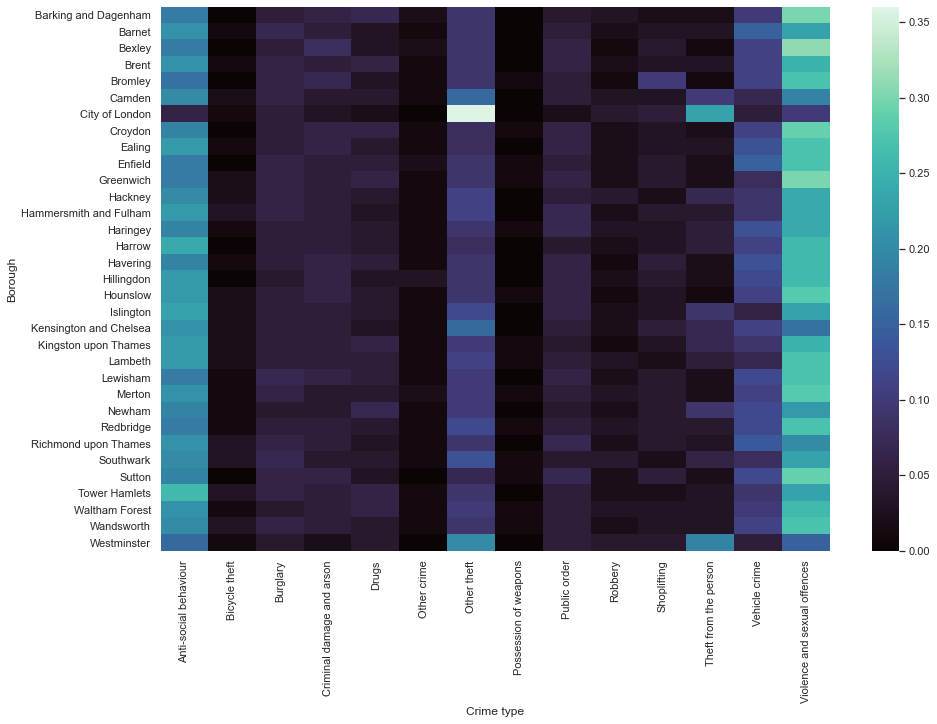

In [172]:
sns.heatmap(df_cross_pct_rows, cmap="mako")

**Task:** Add `margins` to the normalised dataframes, to see proportional distribution between crime types.

# Output
You can save a dataframe in various formats. The most-used methods for writing to file are `to_excel()` and `to_csv()`, and (more simply) copying to clipboard for pasting into Excel or similar software using `to_clipboard()`.

First, list your dataframes, using the `%who_ls` magic method.

In [175]:
# List all the dataframes in the notebook
%who_ls DataFrame

['df',
 'df_cross_pct_cols',
 'df_cross_pct_rows',
 'df_crossed',
 'df_crossed_margins',
 'df_grouped',
 'df_select']

## Copy to clipboard
The commonly used to_clipboard() method is good for copy/pasting small datasets into Excel (or other spreadsheet software) on the fly.

In [ ]:
# Copy to clipboard
df_cross_pct_rows.to_clipboard()